In [59]:
import torch
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np

# Load fine tuned model

In [49]:
# Load the trained model 
model = torch.load('./result2/weights.pt')
model.eval()

/home/ub/.local/lib/python3.5/site-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torchvision.models._utils.IntermediateLayerGetter' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/ub/.local/lib/python3.5/site-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/home/ub/.local/lib/python3.5/site-packages/torch/serialization.py:493: SourceChangeWarning: source code of class 'torchvision.models.resnet.Bottleneck' has changed. you can retrieve the original source code by accessi

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [61]:
from os import listdir
from os.path import isfile, join

path = "carotida-binary/Images"
images = [f for f in listdir(path) if isfile(join(path, f))]

FRACTION = 0.1

In [63]:
test_images = images[int(np.ceil(len(images)*(1-FRACTION))):]

# Predict over the test set

------------------------------
Model's IoU over Test Set:  0.7906304388271005
------------------------------


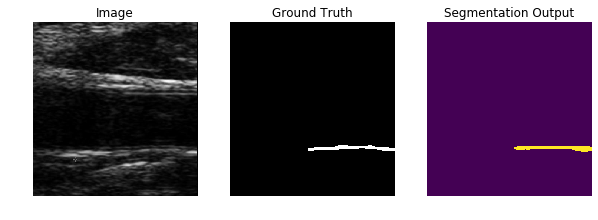

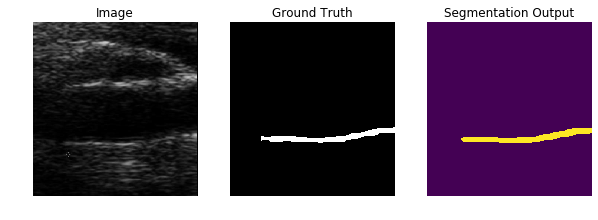

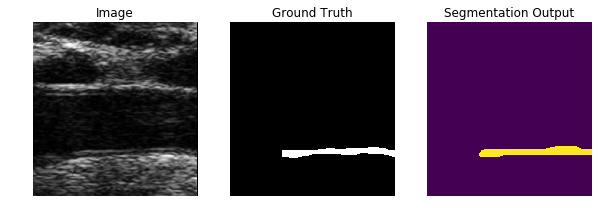

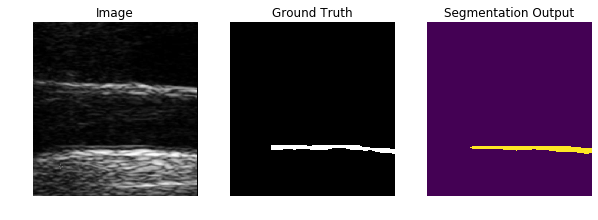

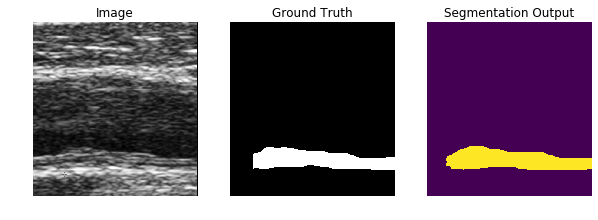

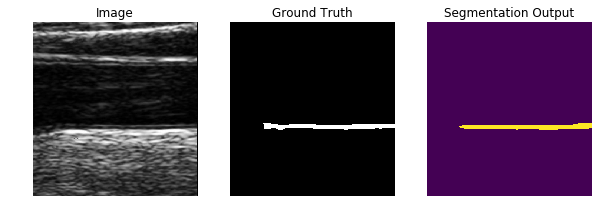

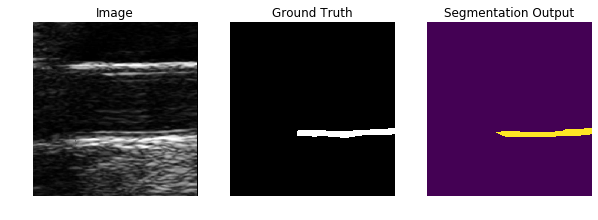

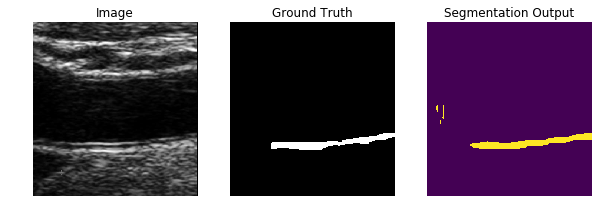

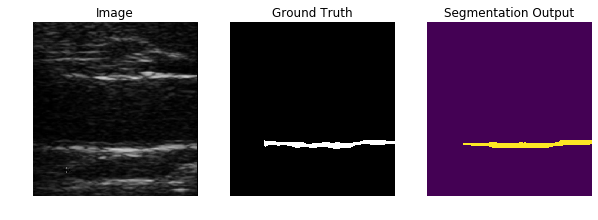

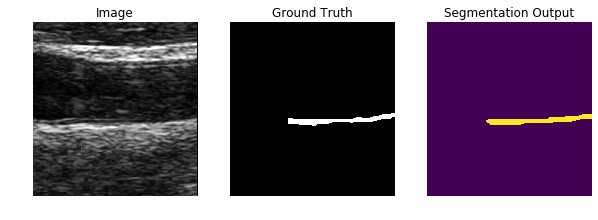

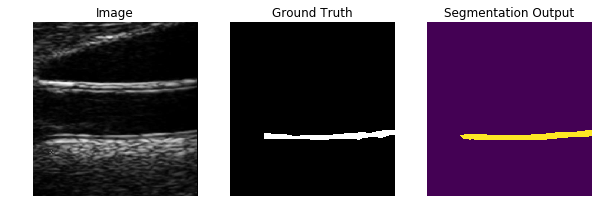

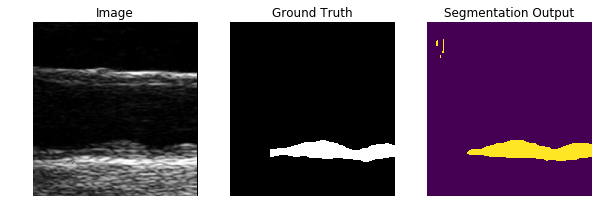

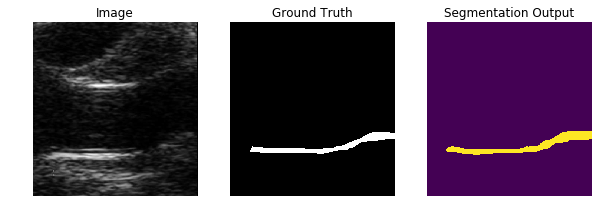

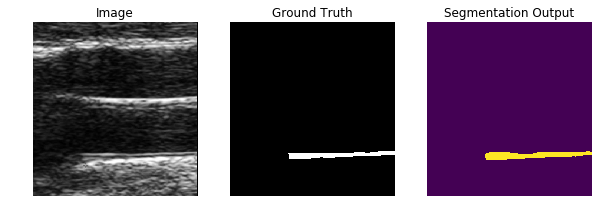

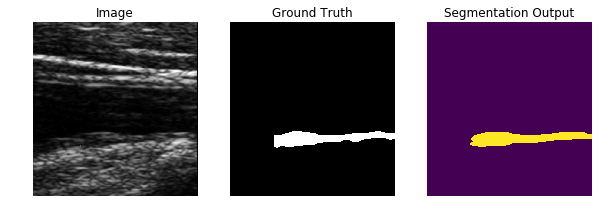

In [132]:
IOUs = []

for image in test_images:
    name = image.replace('.jpg','')
    img = cv2.imread("./carotida-binary/Images/"+image).transpose(2,0,1).reshape(1,3,470,445)
    mask = cv2.imread("./carotida-binary/Masks/"+name+".png")
    
    with torch.no_grad():
        mod = model(torch.from_numpy(img).type(torch.FloatTensor)/255)
        
    gt_bool = (mask[:,:,0] == 255)
    result_bool = (mod['out'].cpu().detach().numpy()[0][0]>0.5)
    
    plt.figure(figsize=(10,10));
    
    # Plot the input image, ground truth and the predicted output
    plt.subplot(131);
    plt.imshow(img[0,...].transpose(1,2,0));
    plt.title('Image')
    plt.axis('off');

    plt.subplot(132);
    plt.imshow(mask);
    plt.title('Ground Truth')
    plt.axis('off');

    plt.subplot(133);
    plt.imshow(result_bool);
    plt.title('Segmentation Output')
    plt.axis('off');
    
    #Compute IoU
    overlap = gt_bool*result_bool # Logical AND
    union = gt_bool + result_bool # Logical OR
    IOU = overlap.sum()/float(union.sum())
    IOUs.append(IOU)

print("------------------------------")
print("Model's IoU over Test Set:  " + str(np.mean(IOUs)))
print("------------------------------")